In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_files

In [ ]:
DATA_DIR = "bbc"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=1000)
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])

In [6]:
df.head(30)

,text,label
0,News Corp eyes video games market\n\nNews Corp...,0
1,Wasps 31-37 Leicester\n\nLeicester withstood a...,3
2,Looks and music to drive mobiles\n\nMobile pho...,4
3,'Errors' doomed first Dome sale\n\nThe initial...,2
4,Sculthorpe wants Lions captaincy\n\nPaul Scult...,3
5,Mobile gaming takes off in India\n\nGaming on ...,4
6,Watchdog probes e-mail deletions\n\nThe inform...,2
7,Edwards tips Idowu for Euro gold\n\nWorld outd...,3
8,Parmar ruled out of Davis Cup tie\n\nA knee in...,3
9,World tour for top video gamers\n\nTwo UK game...,4


In [7]:
df[df['label']==2].head(30)

,text,label
3,'Errors' doomed first Dome sale\n\nThe initial...,2
6,Watchdog probes e-mail deletions\n\nThe inform...,2
10,Strike threat over pension plans\n\nMillions o...,2
17,Labour MP praises Tory campaign\n\nThe Conserv...,2
19,UK pledges £1bn to vaccine effort\n\nUK Chance...,2
25,Boateng to step down at election\n\nPaul Boate...,2
33,Muslims discuss election concerns\n\nIssues th...,2
34,"Nat Insurance to rise, say Tories\n\nNational ...",2
36,Parties' plans for council tax\n\nAnger at cou...,2
37,Hospital suspends 'no Welsh' plan\n\nAn Englis...,2


In [8]:
df['label'].value_counts()

label
3    511
0    510
2    417
4    401
1    386
Name: count, dtype: int64

In [12]:
vec = TfidfVectorizer(stop_words="english")
vec.fit_transform(df.text)
features = vec.transform(df.text.values.astype('U'))

In [13]:
print(vec.fit_transform(df.text))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 322146 stored elements and shape (2225, 29126)>
  Coords	Values
  (0, 18136)	0.1612704141858455
  (0, 6931)	0.3465943954166135
  (0, 10236)	0.07360970246996126
  (0, 27911)	0.31587056743356146
  (0, 11475)	0.3283832884826853
  (0, 16592)	0.08110614078305894
  (0, 16921)	0.04990582623054797
  (0, 6335)	0.03985788367179136
  (0, 6804)	0.07078282847027467
  (0, 3092)	0.06061306404295532
  (0, 3931)	0.08987115915528254
  (0, 22751)	0.09402576196844768
  (0, 17790)	0.1025143692380321
  (0, 10234)	0.09988134575380447
  (0, 1648)	0.041834858381710624
  (0, 10677)	0.050523744936500796
  (0, 26425)	0.045846047438713504
  (0, 5684)	0.041035844478622276
  (0, 18709)	0.061941968455487294
  (0, 18574)	0.06615468662500174
  (0, 19686)	0.06014464525432041
  (0, 5664)	0.3296745970569792
  (0, 22845)	0.03362473594960074
  (0, 15036)	0.07526197632494032
  (0, 26459)	0.1157471161376832
  :	:
  (2224, 28495)	0.059227455020758636
  (2224, 27985)

In [14]:
features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02280016, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02459015, 0.        , ..., 0.        , 0.        ,
        0.        ]], shape=(2225, 29126))

In [15]:
len(features.toarray()) , len(features.toarray()[0]) 

(2225, 29126)

In [17]:
# apply minibatch kmeans and elpow method

for n_clusters in range(1,11):
    cls = MiniBatchKMeans(n_clusters=n_clusters, random_state=1000)
    cls.fit(features)
    print("Number of clusters:", n_clusters, " Inertia:", cls.inertia_)

# work with best n_clusters = 2
cls = MiniBatchKMeans(n_clusters=2, random_state=1000)
cls.fit(features)
labels = cls.labels_
labels

Number of clusters: 1  Inertia: 2177.6270900701834
Number of clusters: 2  Inertia: 2162.014232326155
Number of clusters: 3  Inertia: 2148.033154997712
Number of clusters: 4  Inertia: 2135.2909764901024
Number of clusters: 5  Inertia: 2124.971886810172
Number of clusters: 6  Inertia: 2120.903700229126
Number of clusters: 7  Inertia: 2115.4163388566203
Number of clusters: 8  Inertia: 2106.4408724399523
Number of clusters: 9  Inertia: 2100.3914480596977
Number of clusters: 10  Inertia: 2098.2457320021276


array([0, 1, 0, ..., 0, 1, 1], shape=(2225,), dtype=int32)

In [18]:
# predict cluster labels for new dataset
cls.predict(features)

array([0, 1, 0, ..., 0, 1, 1], shape=(2225,), dtype=int32)

In [16]:
# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_[:20]

array([1, 3, 1, 4, 3, 1, 4, 3, 3, 4, 4, 1, 1, 4, 4, 3, 1, 0, 4, 4])

In [19]:
cls.cluster_centers_

array([[1.11616203e-04, 1.13446280e-02, 3.70273102e-05, ...,
        0.00000000e+00, 0.00000000e+00, 3.52111150e-05],
       [8.75555906e-05, 5.73228780e-03, 0.00000000e+00, ...,
        1.19601648e-04, 4.25520654e-04, 2.45569074e-04]], shape=(2, 29126))

In [20]:
len(cls.cluster_centers_) , len(cls.cluster_centers_[0])

(2, 29126)

In [21]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=100)
reduced_features = pca.fit_transform(features.toarray())
reduced_features

array([[-0.04277219,  0.06662464],
       [-0.07835577, -0.13051088],
       [-0.07326799,  0.26373002],
       ...,
       [-0.05109815,  0.19521583],
       [-0.07536488, -0.04117384],
       [-0.04190159, -0.06617138]], shape=(2225, 2))

In [22]:
len(reduced_features) , len(reduced_features[0]) 

(2225, 2)

In [23]:
# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
reduced_cluster_centers

array([[ 0.04611929,  0.04872434],
       [-0.06412426, -0.06613062]])

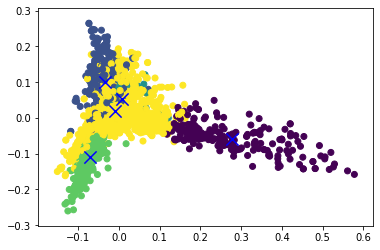

In [22]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')


In [ ]:
from sklearn.metrics import homogeneity_score
homogeneity_score(df.label, cls.predict(features))

0.5519826236931732

In [24]:
cls.predict(vec.transform(['president']))

array([4])

In [25]:
cls.predict(vec.transform(['music']))

array([1])

In [26]:
cls.predict(vec.transform(['game']))

array([3])

In [27]:
cls.predict(vec.transform(['festival']))

array([4])

In [28]:
cls.predict(vec.transform(['talks']))

array([4])